# TP5: Messi
***
Obejtivos: A partir de una plantilla definida del objeto, hallar el mismo en distintas fotos utilizando los conceptos de piramides y transformaciones geométricas.
+ Pirámides: Se refieren a representar una misma imagen en multiples resoluciones, cada nivel consta de dos pasos: Suavizado y submuestreo.
+ Transformación geométrica: Es un algoritmo de deformación directa, calcula la posición de destino y copia el pixel.

Se plantean estas funciones dado que la búsqueda de objetos en distintas imágenes puede verse con dificultades, por las diferencias de resoluciones entre las imagenes a buscar. 

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib 

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

+ Cargamos la primera imagen de la cual seleccionamos el patron a identificar.

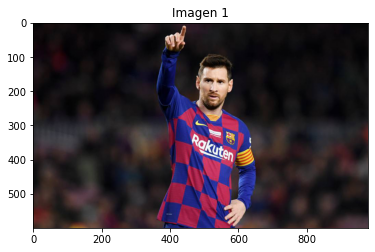

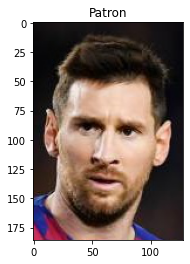

In [2]:
# Cargamos la imagen a procesar
imagen = cv.imread('./Messi/Messi_1.jpg')
img_rgb= cv.cvtColor(imagen, cv.COLOR_BGR2RGB)

template = cv.imread('patron1.jpg')
temp_rgb= cv.cvtColor(template, cv.COLOR_BGR2RGB)
temp_gray=cv.cvtColor(template,cv.COLOR_BGR2GRAY)

plt.figure(1)
plt.title("Imagen 1")
plt.imshow(img_rgb)

plt.figure(2)
plt.title("Patron")
plt.imshow(temp_rgb)
plt.show()

+ Aplicamos los distintos metodos de comparacion que proveé Opencv a esta imagen.
    + Búsqueda de máximos: TM_CORR, TM_CCORR_NORMED, TM_CCOEFF, TM_CCOEFF_NORMED
    + Búsqueda de mínimos: TM_SQDIFF, TM_SQDIFF_NORMED
    
   

In [3]:
def match(img, template, meth):
    
    img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_salida = img_rgb.copy()
    
    temp_rgb= cv.cvtColor(template, cv.COLOR_BGR2RGB)
    temp_gray= cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    
    w, h = temp_gray.shape[::-1]
    
    method = eval(meth)
    
    # Aplicamos la coincidencia de patrones
    res = cv.matchTemplate(img_gray,temp_gray,method)
    
    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    # Marcamos el lugar donde lo haya encontrado
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
    
    return img_salida,res

In [4]:
def graficar_match(img_salida,res,method):
    plt.figure(figsize=(15,4))
    
    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(method)
    plt.show()

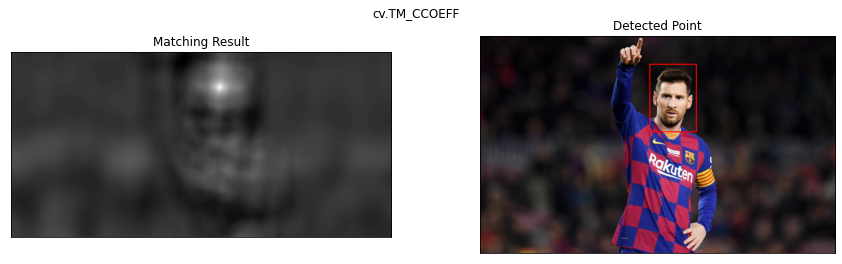

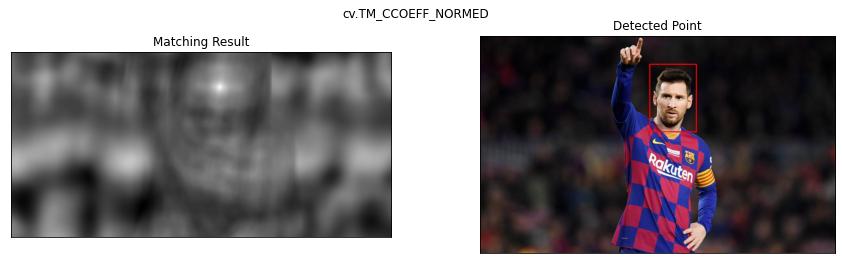

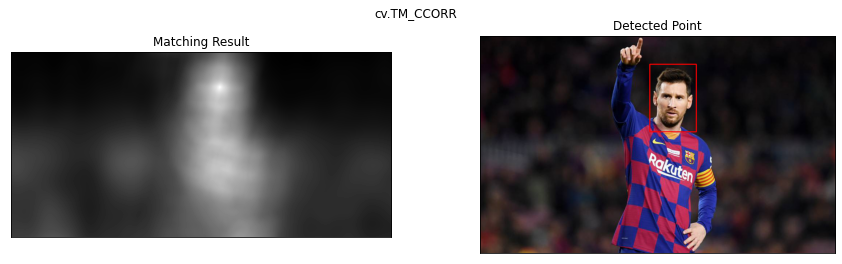

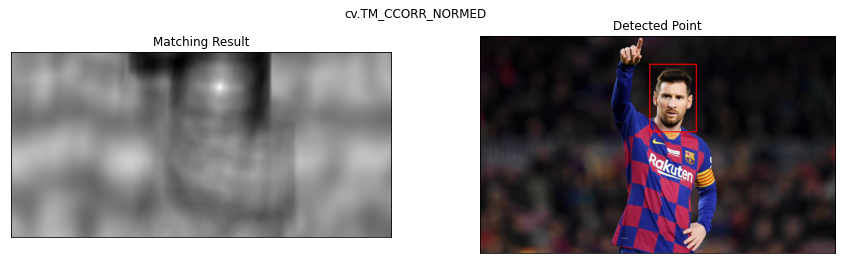

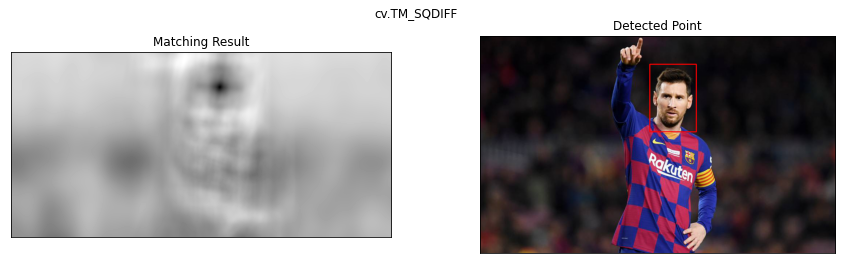

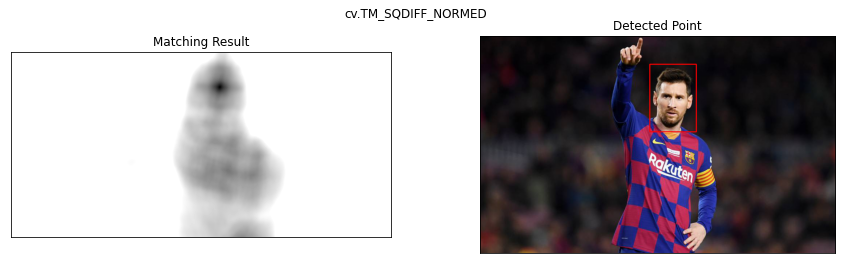

In [5]:
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for method in methods:
    
    #Aplicamos el metodo a la imagen
    img_salida,res = match(imagen, template, method)
    
    # Graficamos el procesamiento y la salida
    graficar_match(img_salida,res,method)

+ Verificamos que con todos los distintos metodos la deteccion funciona correctamente, por ende nos aseguramos que el template utilizado es correcto.

+ Se cargan todas las imagenes de Messi. Para eso debemos importar la libreria glob que nos permite crear una lista con nombres de archivo en un directorio.

In [6]:
from glob import glob

img_fnames = glob('./Messi/*.jpg')
print(img_fnames)

['./Messi\\Messi_1.jpg', './Messi\\Messi_2.jpg', './Messi\\Messi_3.jpg', './Messi\\Messi_4.jpg', './Messi\\Messi_5.jpg', './Messi\\Messi_6.jpg', './Messi\\Messi_7.jpg', './Messi\\Messi_8.jpg']


In [7]:
imgs = []
for fname in img_fnames:
    img = cv.imread(fname)
    #img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)

print("Se cargaron {0} imágenes".format(len(imgs)))

Se cargaron 8 imágenes


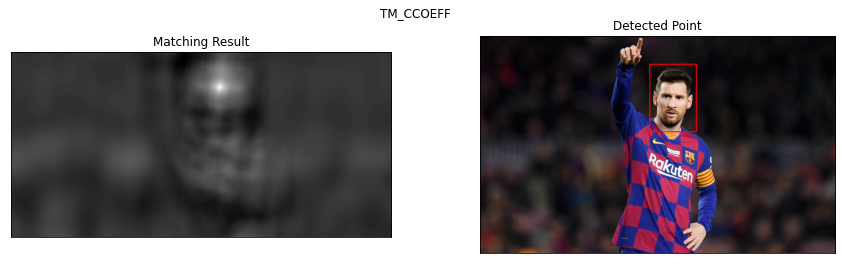

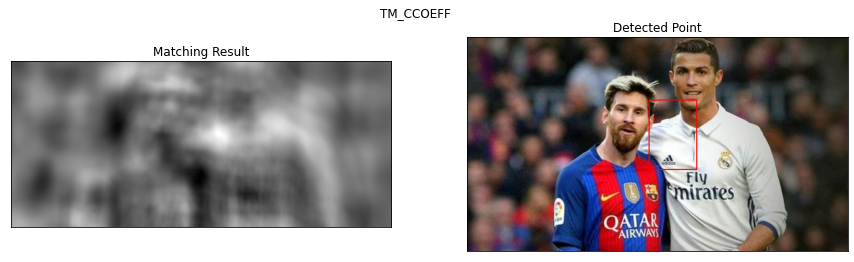

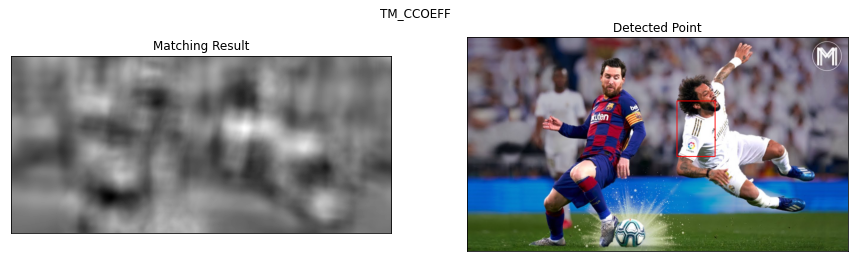

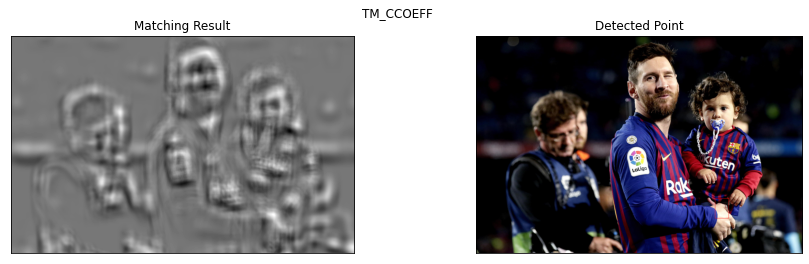

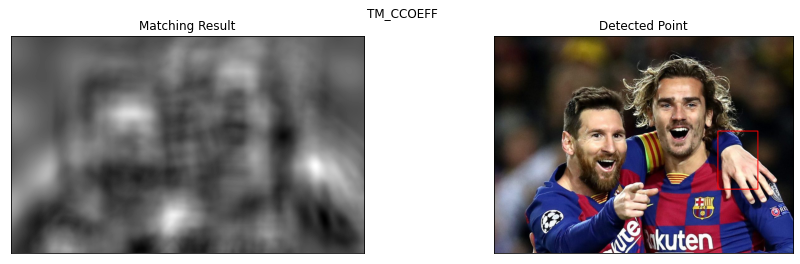

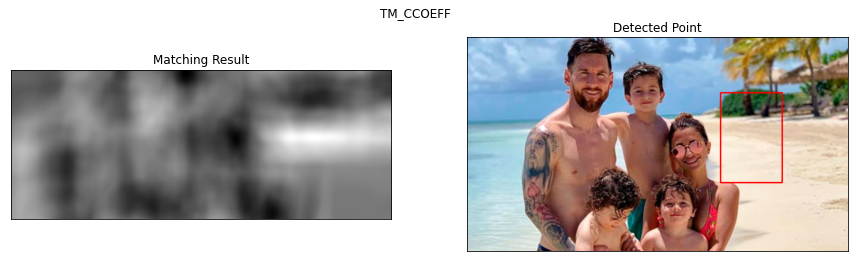

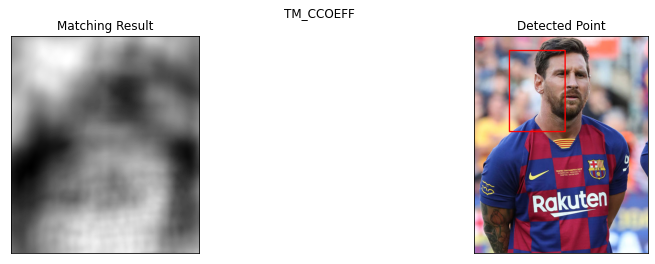

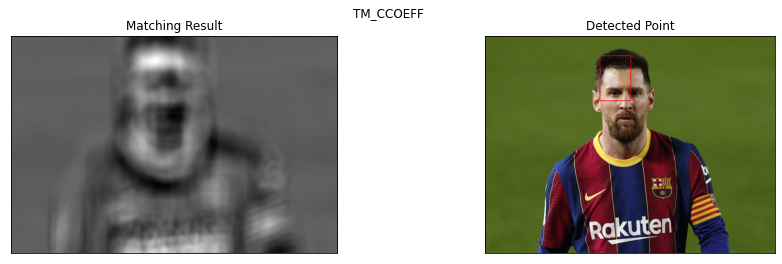

In [8]:
for image in imgs:
    #Aplicamos el metodo SQDIFF a cada imagen con el mismo template
    img_salida,res = match(image, template, 'cv.TM_CCOEFF')
    
    # Graficamos el procesamiento y la salida
    graficar_match(img_salida,res,'TM_CCOEFF')

+ Usando el mismo patron para todas las imagenes no devuelve el resultado esperado. Esto es porque las imagenes tienen diferentes resoluciones y (tienen diferentes caracteristicas luz, constraste). Para ello analizamos sus resoluciones.

# Cambio de tamaño

+ Primero mostramos los tamaños de cada imagen

In [ ]:
cont=1

for image in imgs:
    print('\nTamaño imagen {}: {} pix'.format(cont,image.shape))
    cont+=1 

# Metodo automático

+ Planteamos un método que opere de manera autónoma a la hora de analizar y encontrar el template (patron) en las imágenes anteriormente cargadas.
    1. Describimos el template como imagen de bordes aplicando el algoritmo de canny, de esta manera nos aseguramos una coincidencia mayor sobre las imagenes.
    2. Leemos las imagenes anteriormente cargadas y aplicamos el procesamiento de búsqueda de coincidencia y mostramos las mismas.
    

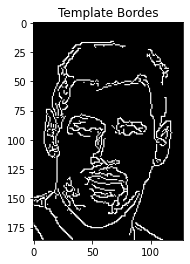

In [9]:
template=cv.Canny(temp_gray,100,250,apertureSize=3)
tH,tW=template.shape[:2]
plt.title("Template Bordes")
plt.imshow(template,cmap="gray")
plt.show()

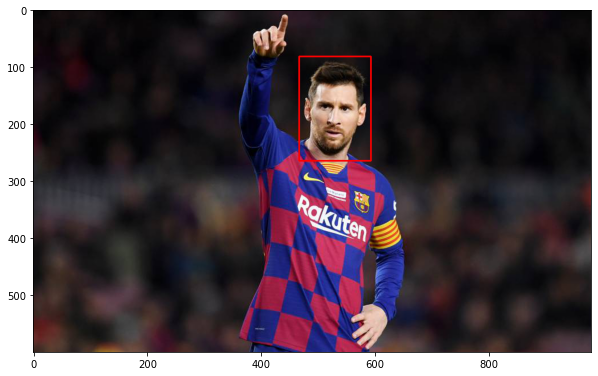

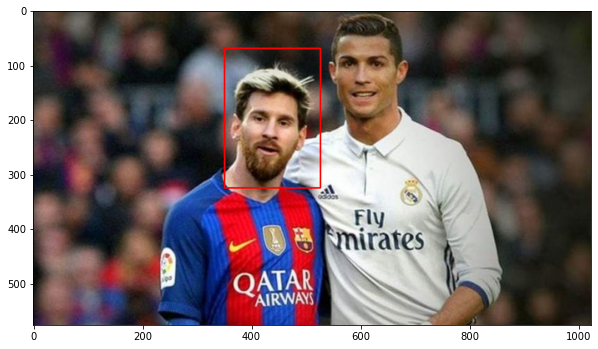

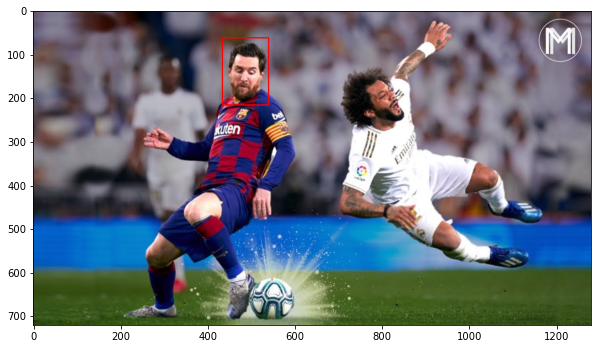

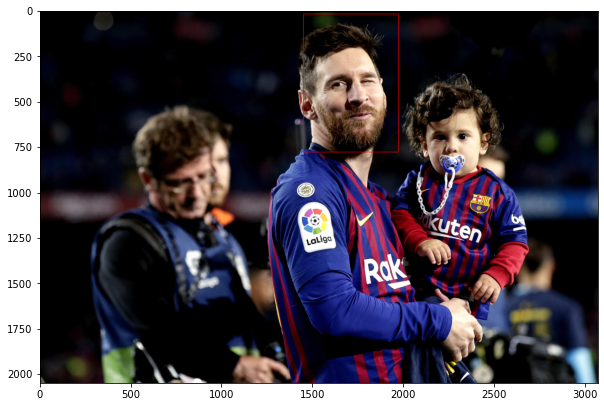

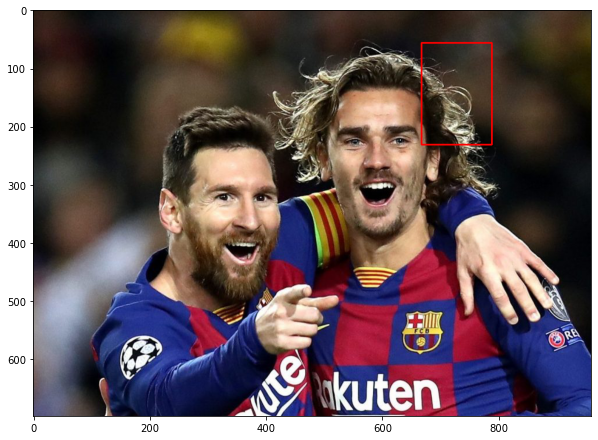

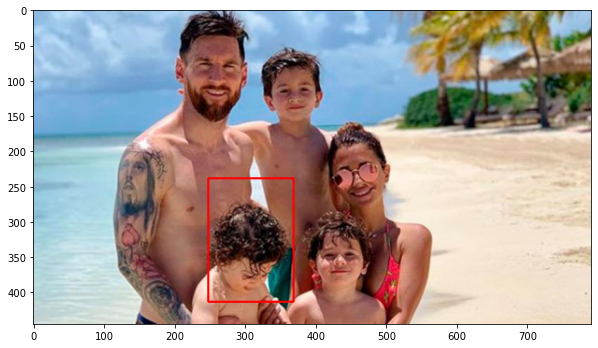

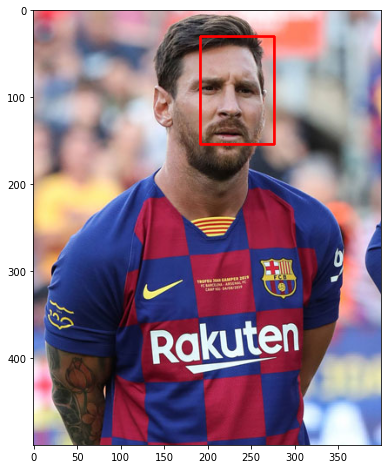

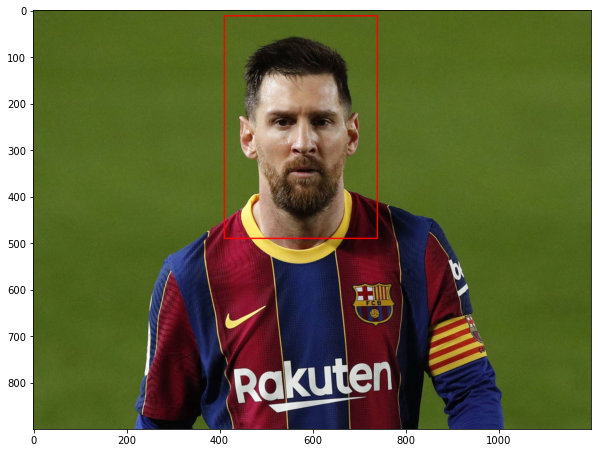

In [10]:
d=9
n=1

for image in imgs:
    img_copia=image.copy()
    #Utilizamos un filtro bilateral de manera que suavicemos los bordes de la imagen para un mejor procesamiento en canny
    fil_bilateral = cv.bilateralFilter(img_copia, d, 2*d, d/2)
    img_gray=cv.cvtColor(fil_bilateral,cv.COLOR_BGR2GRAY)
    
    #Definimos el tamaño de la imagen de grises con gH=alto y gW=ancho
    gH,gW=img_gray.shape[:2]
    
    #Found es el parámetro donde se guardará el mayor máximo encontrado, su posición y el factor convertivo r
    found=None
    
    #La función linspace de numpy la utilizamos para establecer un intervalor de 0.1 a 1.5 dividido en 30 partes.
    for scale in np.linspace(0.1,1.5,30)[::-1]:
       
        #Cambiamos el tamaño de la imagen con cv.resized utilizando las distintas escalas para el tamaño de la imagen
        resized=cv.resize(img_gray,(int(scale*gW),int(scale*gH)), interpolation = cv.INTER_AREA)
        
        #Definimos r como el factor convertivo que guarda la relación entre el tamaño original y el reducido
        r= gW/float(resized.shape[1])
        
        #se rompe el ciclo cuando el tamaño de la imagen modificada es menor que la del template
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break
        
        #Pasamos la imagen a bordes utilizando canny
        edged=cv.Canny(resized,50,250,apertureSize=3)
        
        #Hallamos las coincidencias con matchTemplate
        resultado=cv.matchTemplate(edged,template,cv.TM_CCOEFF)
        
        #Guardamos el maximo valor y su ubicacion puesto que utilizamos TM_CCOEFF
        _,maxVal,_,maxLoc=cv.minMaxLoc(resultado)
        if found is None or maxVal>found[0]:
            found=(maxVal,maxLoc,r)
    
    #Una vez terminada la iteración sobre el intervalo de tamaños desempaquetamos found, el cual guardó el máximo valor
    # su ubicación y su factor de reducción r.
    (_,maxLoc,r)=found
    
    #Definimos las posiciones (x,y) de coincidencia para luego dibujar el recuadro que marque la misma.
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
    
    #Dibujamos el rectangulo
    image_rgb=cv.cvtColor(img_copia,cv.COLOR_BGR2RGB)
    cv.rectangle(image_rgb,(startX,startY),(endX,endY), 255, 2)
    
    plt.figure(figsize=(10,8))
    plt.imshow(image_rgb)
    plt.show()

# Método Manual
- Utilizamos Pirámides para el cambio de resolución, Se definen las funciones pyrDown_img y pyrUp_img para los procesamientos.

In [11]:
def pyrDown_img(imagen):
    imgs_pyrDown = []
    img = imagen
    
    for i in range(0,4):
        print('\nTamaño imagen nivel {}: {} pix'.format(i,img.shape))
        imgs_pyrDown.append(img)
        img = cv.pyrDown(img)
    
    return imgs_pyrDown

In [12]:
def pyrUp_img(imagen):
    imgs_pyrUp = []
    img = imagen
    
    for i in range(0,4):
        print('\nTamaño imagen nivel {}: {} pix'.format(i,img.shape))
        imgs_pyrUp.append(img)
        img = cv.pyrUp(img)
    
    return imgs_pyrUp

In [13]:
#Volvemos a leer el template original
template = cv.imread('patron1.jpg')

##### Modificamos la quinta imagen

In [14]:
img5_pyrDown = pyrDown_img(imgs[4])


Tamaño imagen nivel 0: (698, 960, 3) pix

Tamaño imagen nivel 1: (349, 480, 3) pix

Tamaño imagen nivel 2: (175, 240, 3) pix

Tamaño imagen nivel 3: (88, 120, 3) pix


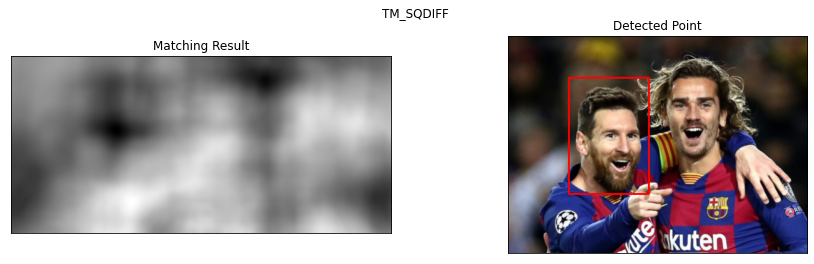

In [15]:
# Le aplico el match a la imagen de nivel 1 con el metodo SQDIFF

img5_nivel_2 = img5_pyrDown[1]

img5_salida,res5 = match(img5_nivel_2, template, 'cv.TM_SQDIFF')
    
graficar_match(img5_salida,res5,'TM_SQDIFF')

##### Modificamos la sexta imagen

In [16]:
img6_pyrDown = pyrUp_img(imgs[5])


Tamaño imagen nivel 0: (445, 791, 3) pix

Tamaño imagen nivel 1: (890, 1582, 3) pix

Tamaño imagen nivel 2: (1780, 3164, 3) pix

Tamaño imagen nivel 3: (3560, 6328, 3) pix


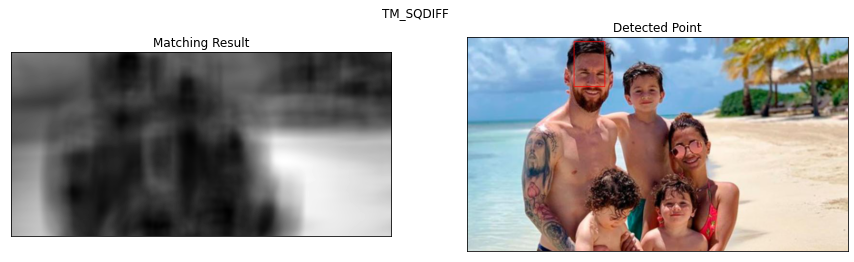

In [17]:
# Le aplico el match a la imagen de nivel 1 con el metodo SQDIFF

img6_nivel_2 = img6_pyrDown[1]

img6_salida,res6 = match(img6_nivel_2, template, 'cv.TM_SQDIFF')
    
graficar_match(img6_salida,res6,'TM_SQDIFF')

# Analisis de resultados y conclusiones

+ Luego del procesamiento autónomo si bien marcó en la mayoría de las imágenes con gran precisión, en dos no lo logró. Esto puede deberse a que el problema del template matching no solo se debe a una cuestión de resoluciones, sino que existen otros factores que no se contemplaron en su totalidad a la hora del procesamiento. Por ello luego evidenciamos con pirámides gaussianas, las cuales además del cambio de resolución también implica un suavizado de la misma, que para la imagen 5 se logra un matcheo muy bueno, mientras que en la imagen 6 no se logra un resultado tan claro.  